# Datenexploration & Feature Engineering


### Setup

In [ ]:
# notebook_exploration.ipynb
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport

import plotly.express as px
from plotly.subplots import make_subplots
import ipywidgets as widgets
from IPython.display import display



Matplotlib is building the font cache; this may take a moment.


In [2]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

### Fetch Data

In [3]:
df = pd.read_csv("../candy-data.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   competitorname    85 non-null     object 
 1   chocolate         85 non-null     int64  
 2   fruity            85 non-null     int64  
 3   caramel           85 non-null     int64  
 4   peanutyalmondy    85 non-null     int64  
 5   nougat            85 non-null     int64  
 6   crispedricewafer  85 non-null     int64  
 7   hard              85 non-null     int64  
 8   bar               85 non-null     int64  
 9   pluribus          85 non-null     int64  
 10  sugarpercent      85 non-null     float64
 11  pricepercent      85 non-null     float64
 12  winpercent        85 non-null     float64
dtypes: float64(3), int64(9), object(1)
memory usage: 8.8+ KB


In [5]:
df.describe()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
mean,0.435294,0.447059,0.164706,0.164706,0.082353,0.082353,0.176471,0.247059,0.517647,0.478647,0.468882,50.316764
std,0.498738,0.500140,0.373116,0.373116,0.276533,0.276533,0.383482,0.433861,0.502654,0.282778,0.285740,14.714357
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011000,0.011000,22.445341
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.220000,0.255000,39.141056
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.465000,0.465000,47.829754
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.732000,0.651000,59.863998
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.988000,0.976000,84.180290


In [6]:
df.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


### Histograms

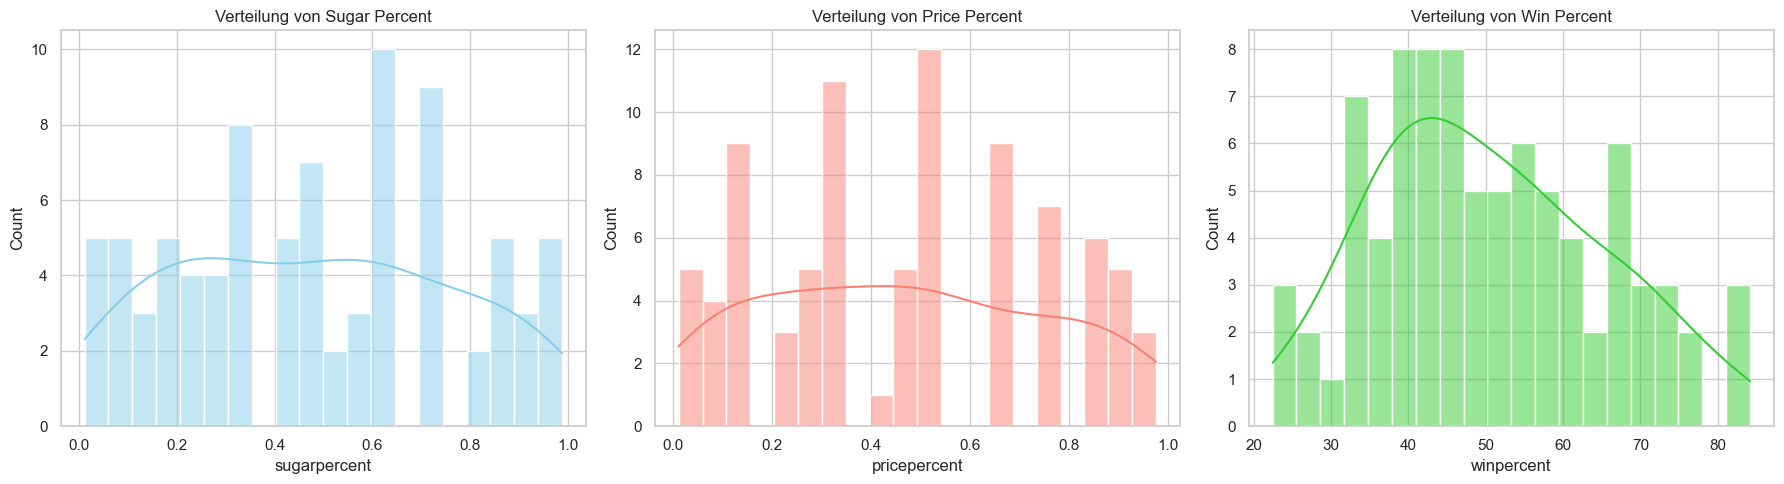

In [8]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(df["sugarpercent"], kde=True, bins=20, ax=axes[0], color="skyblue")
axes[0].set_title("Verteilung von Sugar Percent")

sns.histplot(df["pricepercent"], kde=True, bins=20, ax=axes[1], color="salmon")
axes[1].set_title("Verteilung von Price Percent")

sns.histplot(df["winpercent"], kde=True, bins=20, ax=axes[2], color="limegreen")
axes[2].set_title("Verteilung von Win Percent")

plt.tight_layout()
plt.show()

### Interactive Plots

In [13]:
# Selectable binary columns
categorical_columns = [
    "chocolate", "fruity", "caramel", "peanutyalmondy",
    "nougat", "crispedricewafer", "hard", "bar", "pluribus"
]

# Dropdown widget
dropdown = widgets.Dropdown(
    options=categorical_columns,
    value="chocolate",
    description="Feature:",
    style={"description_width": "initial"},
    layout=widgets.Layout(width="40%")
)

# Interactive plotting function
def update_plot(feature):
    fig = make_subplots(rows=1, cols=2, subplot_titles=[f"{feature}=1", f"{feature}=0"])

    # Group 1
    df1 = df[df[feature] == 1].sort_values("winpercent", ascending=False).head(10)
    fig1 = px.bar(df1, x="competitorname", y="winpercent", color="winpercent", color_continuous_scale="Blues")
    for trace in fig1.data:
        fig.add_trace(trace, row=1, col=1)

    # Group 0
    df0 = df[df[feature] == 0].sort_values("winpercent", ascending=False).head(10)
    fig0 = px.bar(df0, x="competitorname", y="winpercent", color="winpercent", color_continuous_scale="Greens")
    for trace in fig0.data:
        fig.add_trace(trace, row=1, col=2)

    fig.update_layout(title_text=f"Top 10 Candies by Winpercent – Split by {feature}", showlegend=False, height=500)
    fig.show()

# Combine with widget
widgets.interact(update_plot, feature=dropdown);

interactive(children=(Dropdown(description='Feature:', layout=Layout(width='40%'), options=('chocolate', 'frui…

In [ ]:
# Define bins and labels for winpercent categorization
bins = [0, 20, 40, 60, 80, 100]
labels = ['0-20%', '20-40%', '40-60%', '60-80%', '80-100%']

# Create a categorical winpercent variable in the dataframe (assuming df is your DataFrame)
df['winpercent_cat'] = pd.cut(df['winpercent'], bins=bins, labels=labels, include_lowest=True)

# Dropdown widget (same as before)
dropdown = widgets.Dropdown(
    options=[
        "chocolate", "fruity", "caramel", "peanutyalmondy",
        "nougat", "crispedricewafer", "hard", "bar", "pluribus"
    ],
    value="chocolate",
    description="Feature:",
    style={"description_width": "initial"},
    layout=widgets.Layout(width="40%")
)

def update_histogram(feature):
    fig = make_subplots(rows=1, cols=2, subplot_titles=[f"{feature}=1", f"{feature}=0"])

    # Group 1 counts per winpercent_cat
    df1 = df[df[feature] == 1]
    count1 = df1['winpercent_cat'].value_counts().reindex(labels).fillna(0).astype(int).reset_index()
    count1.columns = ['winpercent_cat', 'count']
    fig1 = px.bar(count1, x='winpercent_cat', y='count', color='count', color_continuous_scale='Blues')
    for trace in fig1.data:
        fig.add_trace(trace, row=1, col=1)

    # Group 0 counts per winpercent_cat
    df0 = df[df[feature] == 0]
    count0 = df0['winpercent_cat'].value_counts().reindex(labels).fillna(0).astype(int).reset_index()
    count0.columns = ['winpercent_cat', 'count']
    fig0 = px.bar(count0, x='winpercent_cat', y='count', color='count', color_continuous_scale='Greens')
    for trace in fig0.data:
        fig.add_trace(trace, row=1, col=2)

    fig.update_layout(
        title_text=f"Count of Candies by Winpercent Category – Split by {feature}",
        showlegend=False,
        height=500,
        xaxis_title="Winpercent Category",
        yaxis_title="Count"
    )
    fig.show()

widgets.interact(update_histogram, feature=dropdown);

interactive(children=(Dropdown(description='Feature:', layout=Layout(width='40%'), options=('chocolate', 'frui…

### Full Profile

In [9]:
profile = ProfileReport(df, title="Candy Dataset Profiling Report", explorative=True)
profile.to_file("candy_dataset_profile.html")

print("✅ Profiling report saved as 'candy_dataset_profile.html'")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 13/13 [00:00<00:00, 228.00it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

✅ Profiling report saved as 'candy_dataset_profile.html'
